<a href="https://colab.research.google.com/github/HiyaJain22/compute-task/blob/main/Expt4_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
df=pd.read_csv('/content/Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [87]:
df.shape

(400, 5)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [89]:
corr=df.corr()

In [90]:
corr

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


<Axes: >

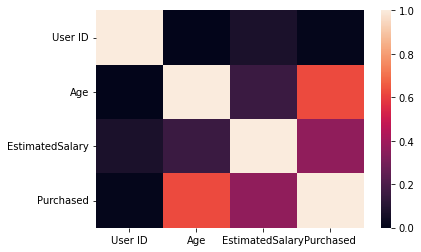

In [91]:
sns.heatmap(corr)

In [92]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
print(df)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510       1   19            19000          0
1    15810944       1   35            20000          0
2    15668575       0   26            43000          0
3    15603246       0   27            57000          0
4    15804002       1   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863       0   46            41000          1
396  15706071       1   51            23000          1
397  15654296       0   50            20000          1
398  15755018       1   36            33000          0
399  15594041       0   49            36000          1

[400 rows x 5 columns]


In [93]:
x = df.drop(['User ID','Purchased'], axis = 1)
y = df['Purchased']

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.1, random_state=0)
     

In [96]:
from sklearn.naive_bayes import GaussianNB

In [97]:
classifier = GaussianNB()

In [98]:
classifier.fit(x_train, y_train)

GaussianNB()

In [99]:
y_pred = classifier.predict(x_test)

In [100]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [101]:
print(accuracy_score(y_test, y_pred))

0.95


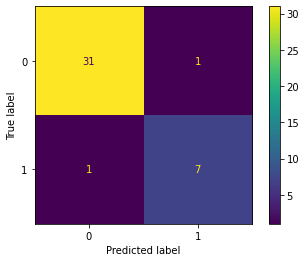

In [102]:
cm=confusion_matrix (y_test , y_pred )
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp. plot ( )
plt. show()

In [103]:
print (classification_report (y_test, y_pred) )

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        32
           1       0.88      0.88      0.88         8

    accuracy                           0.95        40
   macro avg       0.92      0.92      0.92        40
weighted avg       0.95      0.95      0.95        40



# From Scratch


In [104]:
data=pd.read_csv("/content/breastcancer.txt")

In [105]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [108]:
data.shape

(569, 33)

In [109]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [113]:
data.drop(['Unnamed: 32'],axis=1,inplace=True)

In [115]:
#label encoding
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])
     

In [118]:
corr=data.corr()


In [119]:
corr

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


<Axes: >

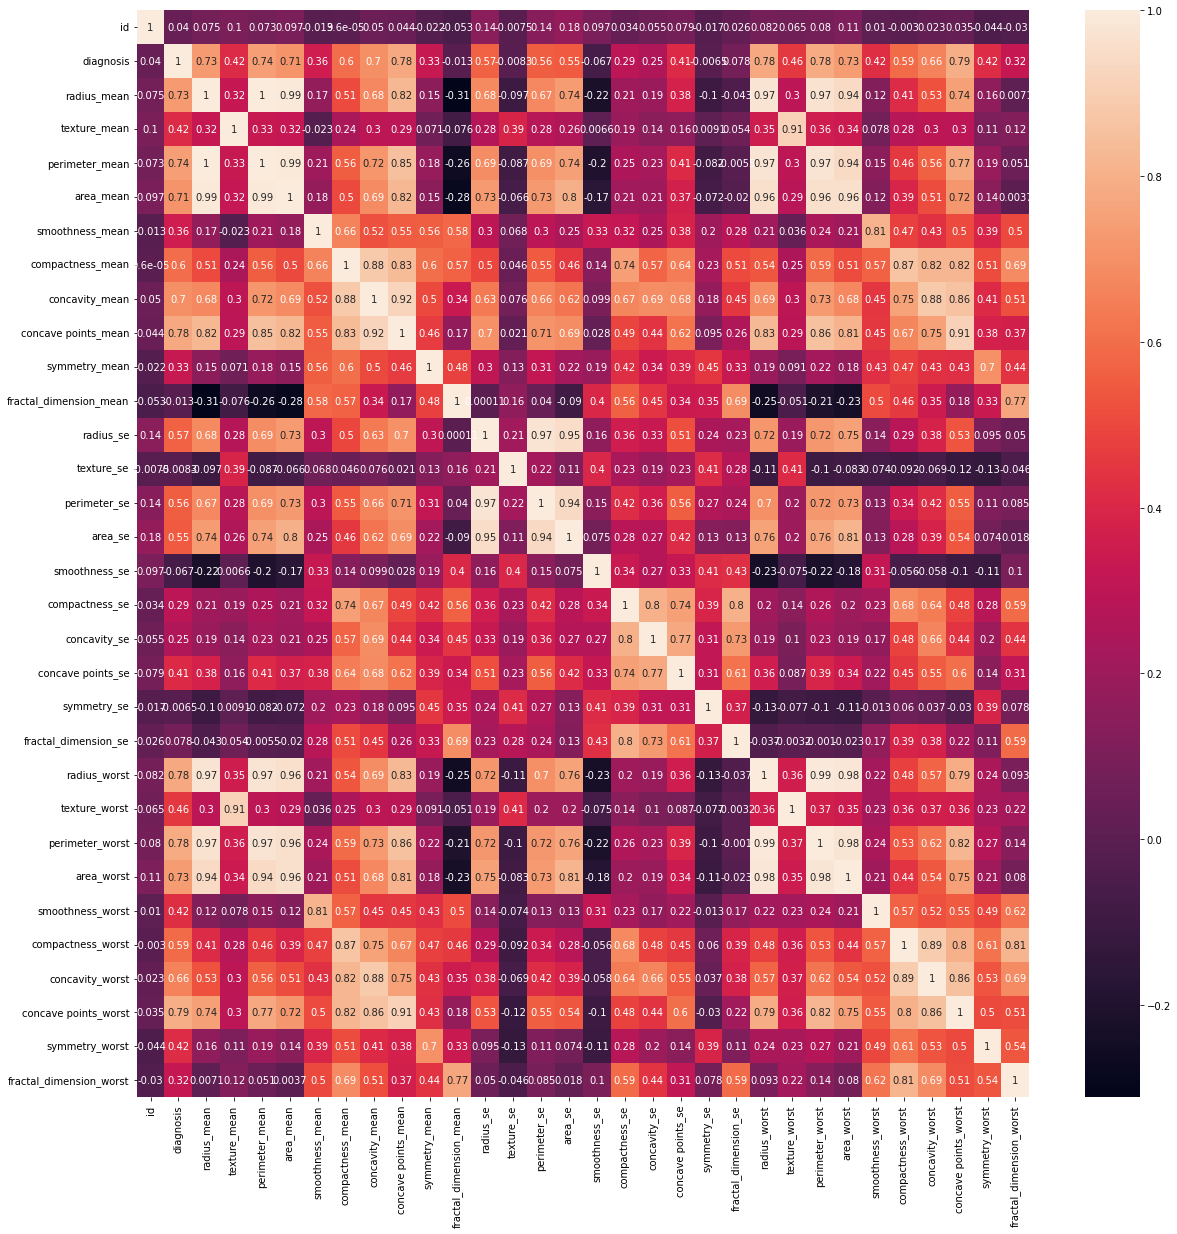

In [122]:

plt.figure(figsize = (20,20))
sns.heatmap(corr,annot=True)

In [124]:

data_features = data.drop(["id", "diagnosis"], axis = 1)
data_features.columns
     


Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

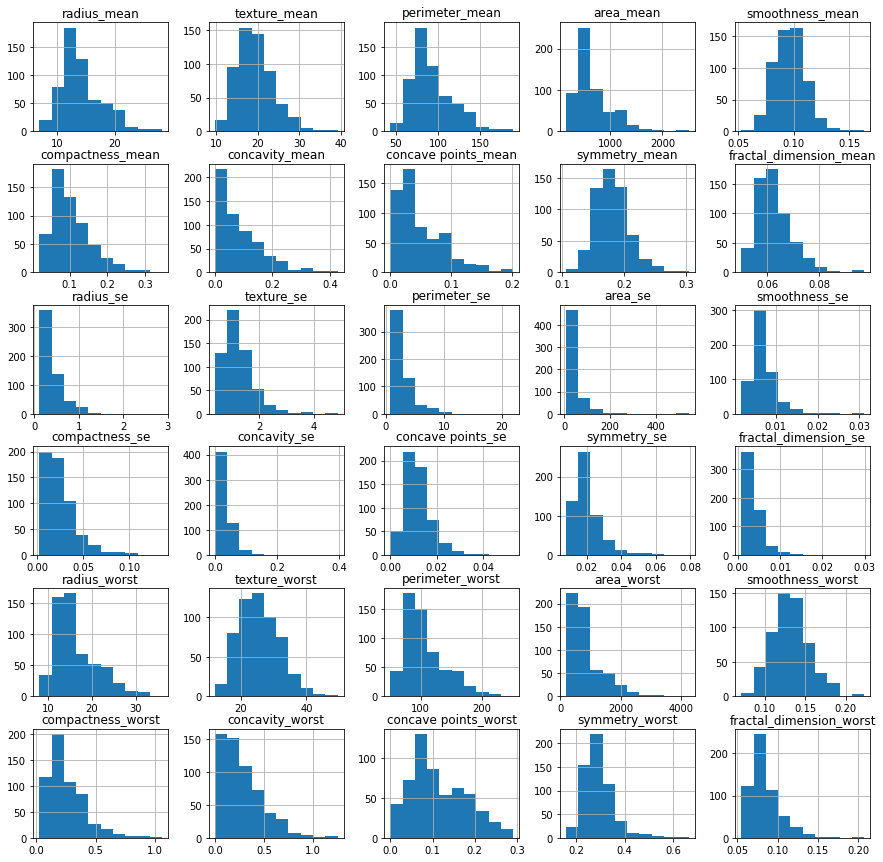

In [126]:
data_features.hist(figsize=(15,15))
plt.show()

In [128]:

data_final = data_features.drop(["texture_se", "smoothness_se","symmetry_se"], axis = 1)

data_final['diagnosis'] = data['diagnosis']

data_final.columns
     

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'perimeter_se', 'area_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'fractal_dimension_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst',
       'diagnosis'],
      dtype='object')

In [132]:

def calculate_prior(data, Y):
  classes = sorted(list(data[Y].unique()))
  prior = []
  for i in classes:
      prior.append(len(data[data[Y]==i])/len(data))
  return prior

In [133]:

def calculate_likelihood_gaussian(data, feat_name, feat_val, Y, label):
  feat = list(data.columns)
  data = data[data[Y]==label]
  mean, std = data[feat_name].mean(), data[feat_name].std()
  p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-((feat_val-mean)**2 / (2 * std**2 )))
  return p_x_given_y

In [136]:

def naive_bayes_gaussian(data, X, Y):
  # get feature names
  features = list(data.columns)[:-1]

  # calculate prior
  prior = calculate_prior(data, Y)

  Y_pred = []
  # loop over every data sample
  for x in X:
      # calculate likelihood
      labels = sorted(list(data[Y].unique()))
      likelihood = [1]*len(labels)
      for j in range(len(labels)):
          for i in range(len(features)):
              likelihood[j] *= calculate_likelihood_gaussian(data, features[i], x[i], Y, labels[j])

      # calculate posterior probability (numerator only)
      post_prob = [1]*len(labels)
      for j in range(len(labels)):
          post_prob[j] = likelihood[j] * prior[j]

      Y_pred.append(np.argmax(post_prob))

  return np.array(Y_pred) 

In [138]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data_final, test_size=0.2, random_state=41)

x_test = test.iloc[:,:-1].values
y_test = test.iloc[:,-1].values
y_pred = naive_bayes_gaussian(train, X=x_test, Y="diagnosis")

In [139]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [140]:

print(f"testing accuracy = {accuracy_score(y_test,y_pred)}")

testing accuracy = 0.9649122807017544


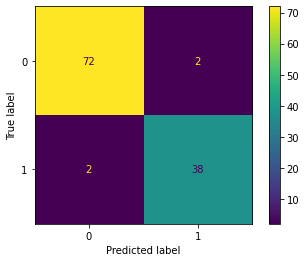

In [141]:

cm=confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [142]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        74
           1       0.95      0.95      0.95        40

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

